## Sentiment Analysis with GridSearchCV

In [1]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import datetime

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# !pip install import-ipynb
import import_ipynb
from Library_functions import*

%matplotlib inline
# Disable seaborn grid
sns.set_style("whitegrid", {'axes.grid': False})
pd.reset_option('all')
import os
import warnings
warnings.filterwarnings('ignore')

No module named 'fasttext'


2024-06-12 13:40:06.649 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-06-12 13:40:06.651 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-06-12 13:40:06.652 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager


In [4]:
# load data
df = pd.read_csv('dataset/processed_data.csv', encoding='utf-8')

In [5]:
# check data
df.head()

,rating,comment,class,Sentiment
0,1.0,tệ gói tương_ớt tương_về tương món gói không_h...,Dislike,0
1,4.2,kêu đói hồi bình_loạn chốt háo_hức nỡ_lòng lượ...,Dislike,0
2,7.4,khuyến_mại tặng trà sữa uống đồ_ăn,Like,1
3,1.0,thề lắm tức_giận thế_này quảng_cáo minion háo_...,Dislike,0
4,10.0,đầu thử vị thần_thánh đồ_ăn hơi kén đầu không_...,Like,1


In [9]:
# Check nan
df.isna().sum()

rating       0
comment      1
class        0
Sentiment    0
dtype: int64

In [10]:
# Bỏ các hàng chứa giá trị NaN
df = df.dropna()

## 2. Count Vectorizer

In [11]:
X=df['comment']
y=df['Sentiment']

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
# apply CountVectorizer
cv = CountVectorizer()
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

In [14]:
# Ghi model
import pickle
filename = "model/cv_model.pkl"
with open(filename, 'wb') as file:
 pickle.dump(cv, file)
# luu model CountVectorizer (count) theo cach tren

In [15]:
# create function to train model and predict
def train_predict(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
    print('Classification report: ', classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Model:  LogisticRegression()
Accuracy:  0.9127641939494405
Confusion matrix:  [[ 520  280]
 [ 141 3885]]
Classification report:                precision    recall  f1-score   support

           0       0.79      0.65      0.71       800
           1       0.93      0.96      0.95      4026

    accuracy                           0.91      4826
   macro avg       0.86      0.81      0.83      4826
weighted avg       0.91      0.91      0.91      4826



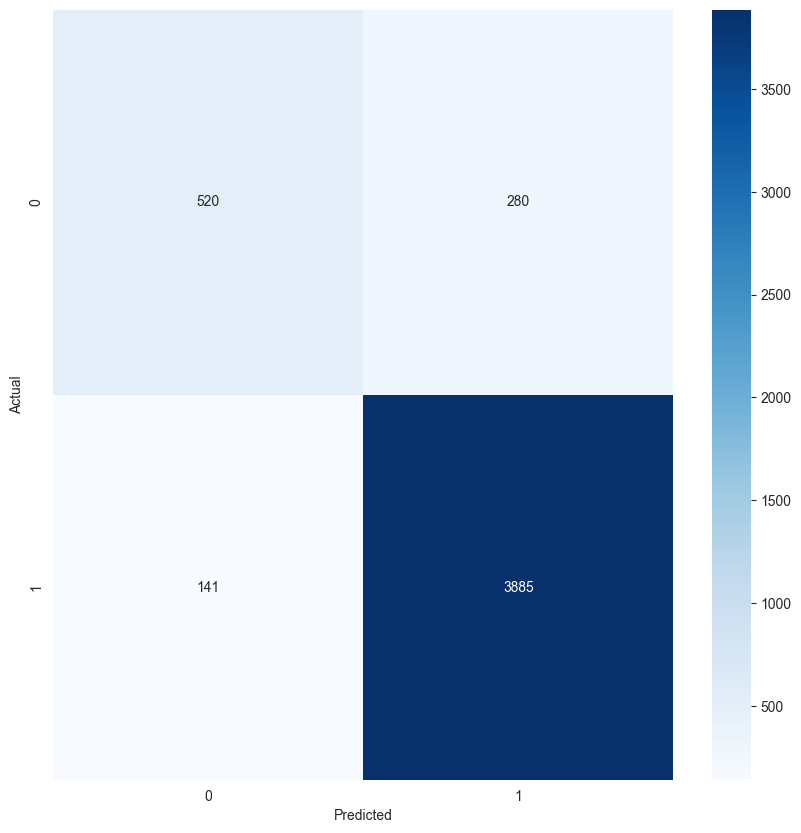

----------------------------------------------------------------------------------------------------
Train model mất :  0:00:00.596014


In [16]:
t0=datetime.datetime.now()
# Train model with CountVectorizer
# List of models
models = [LogisticRegression()]
# Train and predict
for model in models:
    print('Model: ', model)
    train_predict(model, X_train_cv, X_test_cv, y_train, y_test)
    print('-' * 100)

now = datetime.datetime.now()
print('Train model mất : ',now-t0)    

## GridSearchCV

In [17]:
# Create a dictionary of hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'penalty': ['l1', 'l2'], 
              'solver': ['liblinear', 'saga']}
logreg = LogisticRegression()

In [18]:
from datetime import datetime

In [19]:
# Run the grid search and record the time
start = datetime.now()
log_grid    = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
log_grid.fit(X_train_cv, y_train)
end = datetime.now()

In [20]:
print('Grid search times: {}'.format(end - start))

Grid search times: 0:01:35.815447


In [21]:
# Print the best parameters
print(log_grid.best_params_)

{'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [22]:
# Create a new LogisticRegression with the best parameters
log_model = LogisticRegression(
    C=100,
    penalty='l1',
    solver='saga'
)

In [23]:
# Fit the new LogisticRegression to the training data
log_model.fit(X_train_cv, y_train)
y_pred=log_model.predict(X_test_cv)

Accuracy:  0.9156651471197679
Confusion matrix:  [[ 539  261]
 [ 146 3880]]
Classification report:                precision    recall  f1-score   support

           0       0.79      0.67      0.73       800
           1       0.94      0.96      0.95      4026

    accuracy                           0.92      4826
   macro avg       0.86      0.82      0.84      4826
weighted avg       0.91      0.92      0.91      4826



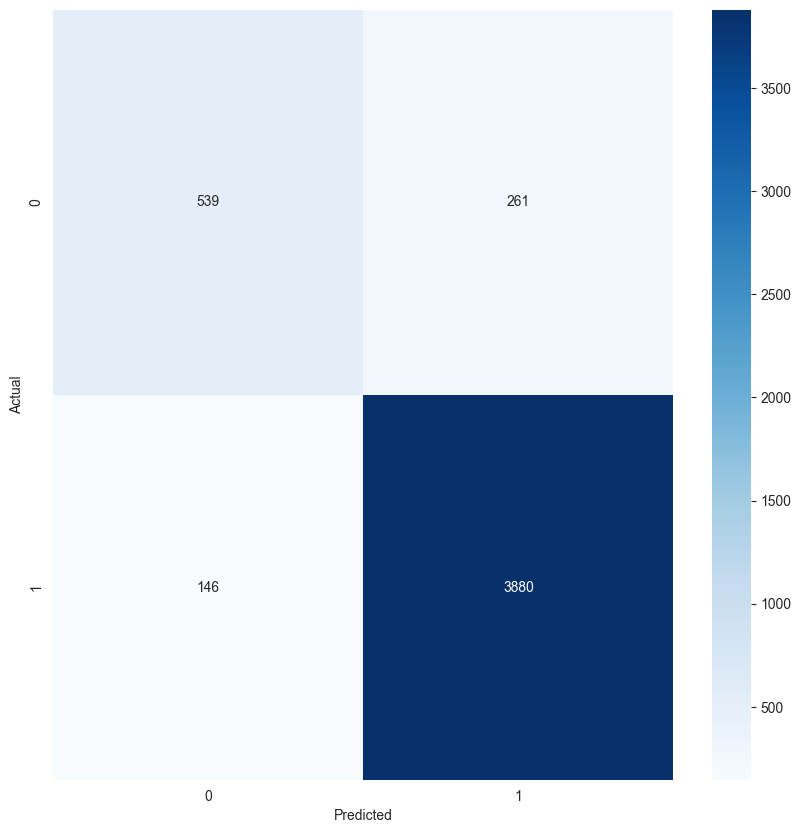

In [24]:
# Print the accuracy
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Confusion matrix: ', confusion_matrix(y_test, y_pred))
print('Classification report: ', classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [26]:
# Ghi model
import pickle
pkl_filename = "model/Sentiment_model_best.pkl"
with open(pkl_filename, 'wb') as file:
 pickle.dump(log_model, file)
# luu model CountVectorizer (count) theo cach tren

In [27]:
# Đọc model
import pickle
pkl_filename = "model/Sentiment_model_best.pkl"
with open(pkl_filename, 'rb') as file:
 model = pickle.load(file)
# doc model count len

In [28]:
# X_new = np.array(['Tôi rất kg hài lòng, giao hàng rất chậm, hàng ko đạt chất lượng'])

X_new = np.array(['món ăn ngon, phục vụ tốt'])
X_new = cv.transform(X_new)

In [29]:
y_pred_new =model.predict(X_new)
y_pred_new

array([1], dtype=int64)